<a href="https://colab.research.google.com/gist/ernestocl/d3e470aceaea9884fcea59070d135348/ts-benchmark-18072022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import datetime


# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# python core library for machine learning and data science
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/sales_train_merged.csv", index_col = 0)
df2 = pd.read_csv("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/sales_test_mean.csv")

In [ ]:
df.head()
df.info()
df.shape
# city -> city_id
# montar el df completo --> hay muchos nulos
# agrupar las ventas por mes

# cruzar los dos dfs
# imputar los nulos

# función que me saque variables de ts rápido

# train test split
# modelo

# evaluar el modelo
# enviar el submit a kaggle

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87963 entries, 0 to 87962
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                87963 non-null  object 
 1   city                87963 non-null  object 
 2   shop_id             87963 non-null  int64  
 3   shop_name           87963 non-null  object 
 4   item_category_id    87963 non-null  int64  
 5   item_category_name  87963 non-null  object 
 6   item_id             87963 non-null  int64  
 7   item_name           87963 non-null  object 
 8   unique_id           87963 non-null  object 
 9   item_price          87963 non-null  float64
 10  item_cnt_day        87963 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.1+ MB


(87963, 11)

In [ ]:
df2.shape

(299, 2)

In [ ]:
df

,date,city,shop_id,shop_name,item_category_id,item_category_name,item_id,item_name,unique_id,item_price,item_cnt_day
0,2013-01-03,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0
1,2013-01-05,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0
2,2013-01-07,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0
3,2013-01-08,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0
4,2013-01-10,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
87958,2015-09-09,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,17.0
87959,2015-09-10,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,18.0
87960,2015-09-11,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,21.0
87961,2015-09-13,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,11.0


In [ ]:
df2

,unique_id,sales
0,11-20949,10.561873
1,11-4181,10.561873
2,12-11365,10.561873
3,12-11369,10.561873
4,12-11370,10.561873
...,...,...
294,6-5823,10.561873
295,6-7856,10.561873
296,7-17717,10.561873
297,7-20949,10.561873


# City - city_id

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df["city_id"] = encoder.fit_transform(df["city"])

In [ ]:
df['city_id'].value_counts()

7     36562
23     8561
16     7004
22     3634
14     2856
2      2497
19     2451
11     2210
18     2049
6      1819
4      1692
15     1644
13     1564
5      1551
21     1432
24     1325
8      1260
3      1119
1      1072
10     1003
12      954
9       910
20      877
25      746
0       615
17      556
Name: city_id, dtype: int64

# Montar el df completo

In [ ]:
import datetime

In [ ]:
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2015, 10, 31)

In [ ]:
date_range = pd.date_range(start = start_date, end = end_date, freq = "M")
date_range

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
unique_id = df["unique_id"].unique()
unique_id

array(['25-2574', '25-2808', '25-2308', '25-5821', '25-5822', '25-5823',
       '25-3851', '24-7856', '24-5822', '24-3007', '24-2308', '24-2808',
       '25-14931', '25-13881', '25-17717', '25-16184', '25-16227',
       '25-16071', '25-7856', '25-7893', '25-7894', '22-464', '19-17717',
       '22-839', '22-482', '19-2808', '19-2308', '19-5822', '22-13370',
       '22-17717', '21-17717', '28-7893', '28-7894', '28-7856', '28-4244',
       '28-2808', '28-2308', '28-16227', '28-13881', '28-17717',
       '26-7856', '26-17717', '26-5822', '4-7856', '4-17717', '6-17717',
       '6-7856', '6-5822', '6-5823', '6-5821', '57-12134', '57-7894',
       '57-7893', '57-3077', '57-2808', '57-2308', '57-1905', '57-6185',
       '57-7856', '57-4244', '57-4248', '57-5822', '58-12134', '58-7893',
       '58-7894', '58-4248', '58-3077', '15-17717', '16-7856', '16-5822',
       '15-5822', '15-2308', '15-2808', '18-7856', '18-5822', '18-17717',
       '16-17717', '7-5822', '7-17717', '14-5822', '14-17717', 

In [ ]:
multiindex = pd.MultiIndex.from_product([date_range, unique_id])
full_df = pd.DataFrame(index = multiindex).reset_index()
full_df.columns = ["date", "unique_id"]
full_df.head()

,date,unique_id
0,2013-01-31,25-2574
1,2013-01-31,25-2808
2,2013-01-31,25-2308
3,2013-01-31,25-5821
4,2013-01-31,25-5822


In [ ]:
full_df.groupby(["unique_id"]).size()

unique_id
11-20949    34
11-4181     34
12-11365    34
12-11369    34
12-11370    34
            ..
6-5823      34
6-7856      34
7-17717     34
7-20949     34
7-5822      34
Length: 299, dtype: int64

In [ ]:
full_df.shape

(10166, 2)

In [ ]:
df

,date,city,shop_id,shop_name,item_category_id,item_category_name,item_id,item_name,unique_id,item_price,item_cnt_day,city_id
0,2013-01-03,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0,7
1,2013-01-05,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7
2,2013-01-07,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7
3,2013-01-08,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0,7
4,2013-01-10,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
87958,2015-09-09,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,17.0,7
87959,2015-09-10,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,18.0,7
87960,2015-09-11,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,21.0,7
87961,2015-09-13,Moscú,25,"Moscú SEC ""Atrium""",71,"Regalos - Bolsas, álbumes, Mats d / ratón",20949,Paquete corporativo Mike 1C Interés blanco (34...,25-20949,5.0,11.0,7


# Agrupar las ventas por mes

In [ ]:
df["revenue"] = df["item_price"] * df["item_cnt_day"]

In [ ]:
def my_func_agg(series):
    
    series_filtered = series[series > 1]
    sum_to_return = np.sum(series_filtered)
    
    return sum_to_return

In [ ]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

In [ ]:
df["date"].nunique()

1003

In [ ]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
df["YEAR"] = df["date"].dt.year
df["MONTH"] = df["date"].dt.month

In [ ]:
df.head()

,date,city,shop_id,shop_name,item_category_id,item_category_name,item_id,item_name,unique_id,item_price,item_cnt_day,city_id,revenue,YEAR,MONTH
0,2013-01-03,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0,7,798.0,2013,1
1,2013-01-05,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7,399.0,2013,1
2,2013-01-07,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7,399.0,2013,1
3,2013-01-08,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0,7,798.0,2013,1
4,2013-01-10,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7,399.0,2013,1


In [ ]:
###################################################################################################################################

In [ ]:
# dias = año4.groupby(["date"])["revenue"].sum()

In [ ]:
# dias.to_excel("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/dias.xlsx")

In [ ]:
# ciudad = df[df["city"] == "Yaroslavl"]

In [ ]:
# ciudad.groupby(["YEAR"])["revenue"].sum()

In [ ]:
# ciudades = df.groupby(['city'])["revenue"].sum()

In [ ]:
# ciudades.to_excel("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/ciudades.xlsx")

In [ ]:
# año = df[df["YEAR"] == 2013]

In [ ]:
# precioitem = año.groupby(['item_name'])['item_price'].max()

In [ ]:
# precioitem.to_excel("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/itempreciomax.xlsx")

In [ ]:
# año2 = df[df["YEAR"] == 2014]

In [ ]:
# catergoria = año2.groupby(['item_category_name'])['item_cnt_day'].sum()

In [ ]:
# catergoria.to_excel("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/catergoriamax.xlsx")

In [ ]:
# diaventas = df.groupby(['date'])['revenue'].sum()

In [ ]:
# diaventas

In [ ]:
# diaventas.to_excel("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/daysales.xlsx")

In [ ]:
# ciudad = df[df["city"] == "Samara"]

In [ ]:
# tienda = ciudad[ciudad['shop_name'] == 'centro de Samara "Parkhouse"']

In [ ]:
# mediatienda = tienda[tienda['YEAR'] == 2013]

In [ ]:
# mediames = mediatienda[mediatienda['MONTH'] == 1 | 2 | 3]

In [ ]:
# mediames.groupby(['city'])['revenue'].sum()

In [ ]:
# df.groupby(["city"])["shop_id"].nunique()

In [ ]:
# df['shop_id'].unique()

In [ ]:
# diaventas = df.groupby(["item_id"])["date"].nunique()

In [ ]:
# diaventas.to_excel("/content/drive/MyDrive/MASTER EN DATA SCIENCE/Módulo 4 - Machine Learning/Módulo 4.3 - Machine  Learning TimeSeries/Proyecto ciudades rusas/ditems.xlsx")

In [ ]:
# ciudad = df[df["city"] == "Surgut"]

In [ ]:
# ciudad.groupby(['item_category_id'])['revenue'].sum()

In [ ]:
##################################################################################################################################################################

In [ ]:
df["item_cnt_day2"] = df["item_cnt_day"]

gb_df = df.set_index("date").groupby("unique_id").resample("M").agg(
    
    {
        "item_cnt_day" : np.sum,
        "revenue"      : np.sum,
        "item_price"   : np.mean,
        "item_id"      : len,
        "item_cnt_day2": my_func_agg 
        
    }
    
).rename(
    columns = {
        "item_cnt_day" : "monthly_sales",
        "revenue"      : "monthly_revenue",
        "item_price"   : "monthly_mean_price",
        "item_id"      : "nr_days_with_sales",
        "item_cnt_day2" : "my_agg_mean"
    }
).reset_index()

In [ ]:
gb_df.drop("my_agg_mean", axis = 1, inplace = True)

In [ ]:
gb_df.shape

(8746, 6)

In [ ]:
# gb_df.groupby("unique_id").size()[gb_df.groupby("unique_id").size() != 33]

In [ ]:
full_df.shape

(10166, 2)

# Join full_df con gb_df

In [ ]:
full_df.head()

,date,unique_id
0,2013-01-31,25-2574
1,2013-01-31,25-2808
2,2013-01-31,25-2308
3,2013-01-31,25-5821
4,2013-01-31,25-5822


In [ ]:
gb_df.head()

,unique_id,date,monthly_sales,monthly_revenue,monthly_mean_price,nr_days_with_sales
0,11-20949,2013-04-30,1.0,3.0,3.0,1
1,11-20949,2013-05-31,4.0,12.0,3.0,3
2,11-20949,2013-06-30,32.0,96.0,3.0,14
3,11-20949,2013-07-31,45.0,135.0,3.0,20
4,11-20949,2013-08-31,59.0,177.0,3.0,25


In [ ]:
print(full_df.shape)
full_df = pd.merge(
    left = full_df,
    right = gb_df,
    how = "left",
    on = ["date", "unique_id"]
)
print(full_df.shape)

(10166, 2)
(10166, 6)


In [ ]:
full_df.isnull().sum()

date                     0
unique_id                0
monthly_sales         1420
monthly_revenue       1420
monthly_mean_price    1700
nr_days_with_sales    1420
dtype: int64

In [ ]:
full_df["monthly_sales"].fillna(0, inplace = True)
full_df["monthly_revenue"].fillna(0, inplace = True)
full_df["nr_days_with_sales"].fillna(0, inplace = True)

In [ ]:
full_df.groupby("unique_id")["monthly_mean_price"].apply(lambda series: series.isnull().sum())

unique_id
11-20949    4
11-4181     8
12-11365    1
12-11369    1
12-11370    1
           ..
6-5823      1
6-7856      2
7-17717     5
7-20949     4
7-5822      1
Name: monthly_mean_price, Length: 299, dtype: int64

In [ ]:
#sample_series = full_df[full_df["unique_id"] == "7-17717"]

In [ ]:
#sample_series

In [ ]:
#sample_series["monthly_mean_price"].interpolate()

In [ ]:
'''
sample_series["monthly_mean_price_imputed_1"] = sample_series["monthly_mean_price"].fillna(sample_series["monthly_mean_price"].mean())
sample_series["monthly_mean_price_imputed_2"] = sample_series["monthly_mean_price"].bfill()
sample_series["monthly_mean_price_imputed_3"] = sample_series["monthly_mean_price"].ffill()
sample_series
'''

'\nsample_series["monthly_mean_price_imputed_1"] = sample_series["monthly_mean_price"].fillna(sample_series["monthly_mean_price"].mean())\nsample_series["monthly_mean_price_imputed_2"] = sample_series["monthly_mean_price"].bfill()\nsample_series["monthly_mean_price_imputed_3"] = sample_series["monthly_mean_price"].ffill()\nsample_series\n'

In [ ]:
#gb_df_ = full_df.groupby(["unique_id"])

In [ ]:
#gb_df_.get_group(("7-17717"))

In [ ]:
# sample, reordeno el df
# guardo var temporal y necesito 2 líneas de código

In [ ]:
full_df["imputed_mean_monthly_price"] = full_df.groupby("unique_id")["monthly_mean_price"].bfill().ffill()

In [ ]:
# lambda

In [ ]:
'''
full_df["imputed_mean_monthly_price_2"] = full_df.groupby(["unique_id"])["monthly_mean_price"].transform(
    lambda series: series.bfill().ffill()
)
'''

'\nfull_df["imputed_mean_monthly_price_2"] = full_df.groupby(["unique_id"])["monthly_mean_price"].transform(\n    lambda series: series.bfill().ffill()\n)\n'

In [ ]:
'''
def bfill_ffill_pandas_series(series):
    return series.bfill().ffill()
'''

'\ndef bfill_ffill_pandas_series(series):\n    return series.bfill().ffill()\n'

In [ ]:
#bfill_ffill_pandas_series(gb_df_.get_group(("7-17717"))["monthly_mean_price"])

In [ ]:
'''
full_df["imputed_mean_monthly_price_3"] = full_df.groupby(["unique_id"])["monthly_mean_price"].transform(
    bfill_ffill_pandas_series
)
'''

'\nfull_df["imputed_mean_monthly_price_3"] = full_df.groupby(["unique_id"])["monthly_mean_price"].transform(\n    bfill_ffill_pandas_series\n)\n'

In [ ]:
full_df.isnull().sum()

date                             0
unique_id                        0
monthly_sales                    0
monthly_revenue                  0
monthly_mean_price            1700
nr_days_with_sales               0
imputed_mean_monthly_price       0
dtype: int64

In [ ]:
df.head()

,date,city,shop_id,shop_name,item_category_id,item_category_name,item_id,item_name,unique_id,item_price,item_cnt_day,city_id,revenue,YEAR,MONTH,item_cnt_day2
0,2013-01-03,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0,7,798.0,2013,1,2.0
1,2013-01-05,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7,399.0,2013,1,1.0
2,2013-01-07,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7,399.0,2013,1,1.0
3,2013-01-08,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,2.0,7,798.0,2013,1,2.0
4,2013-01-10,Moscú,25,"Moscú SEC ""Atrium""",55,Música - CD de la producción local,2574,Del Rey Lana Nació para morir la edición de Pa...,25-2574,399.0,1.0,7,399.0,2013,1,1.0


In [ ]:
full_df.drop(["monthly_mean_price"], axis = 1, inplace = True)
aux_vars = df[["unique_id", "city", "city_id", "shop_name", "shop_id", "item_category_name", "item_category_id", "item_name", "item_id"]].drop_duplicates()

print(full_df.shape)

print(aux_vars.shape)
aux_vars.head()

(10166, 6)
(299, 9)


,unique_id,city,city_id,shop_name,shop_id,item_category_name,item_category_id,item_name,item_id
0,25-2574,Moscú,7,"Moscú SEC ""Atrium""",25,Música - CD de la producción local,55,Del Rey Lana Nació para morir la edición de Pa...,2574
10,25-2808,Moscú,7,"Moscú SEC ""Atrium""",25,Juegos PC - Standard Edition,30,"Diablo III [PC, JEWEL, versión rusa]",2808
28,25-2308,Moscú,7,"Moscú SEC ""Atrium""",25,Juegos PC - Standard Edition,30,"Call of Duty: Black Ops II [PC, Jewel, versión...",2308
48,25-5821,Moscú,7,"Moscú SEC ""Atrium""",25,Las tarjetas de pago - PSN,35,Suscripción de PlayStation Plus 3 meses: Tarje...,5821
49,25-5822,Moscú,7,"Moscú SEC ""Atrium""",25,Las tarjetas de pago - PSN,35,PlayStation Tienda Reposición de la billetera:...,5822


In [ ]:
print(full_df.shape)
full_df = pd.merge(
    left = full_df,
    right = aux_vars,
    how = "left",
    on = "unique_id"
)
print(full_df.shape)

(10166, 6)
(10166, 14)


In [ ]:
full_df.head()

,date,unique_id,monthly_sales,monthly_revenue,nr_days_with_sales,imputed_mean_monthly_price,city,city_id,shop_name,shop_id,item_category_name,item_category_id,item_name,item_id
0,2013-01-31,25-2574,13.0,5187.0,10.0,399.0,Moscú,7,"Moscú SEC ""Atrium""",25,Música - CD de la producción local,55,Del Rey Lana Nació para morir la edición de Pa...,2574
1,2013-01-31,25-2808,30.0,29970.0,18.0,999.0,Moscú,7,"Moscú SEC ""Atrium""",25,Juegos PC - Standard Edition,30,"Diablo III [PC, JEWEL, versión rusa]",2808
2,2013-01-31,25-2308,35.0,27965.0,20.0,799.0,Moscú,7,"Moscú SEC ""Atrium""",25,Juegos PC - Standard Edition,30,"Call of Duty: Black Ops II [PC, Jewel, versión...",2308
3,2013-01-31,25-5821,1.0,599.0,1.0,599.0,Moscú,7,"Moscú SEC ""Atrium""",25,Las tarjetas de pago - PSN,35,Suscripción de PlayStation Plus 3 meses: Tarje...,5821
4,2013-01-31,25-5822,9.0,8991.0,6.0,999.0,Moscú,7,"Moscú SEC ""Atrium""",25,Las tarjetas de pago - PSN,35,PlayStation Tienda Reposición de la billetera:...,5822


# Función que genera vars ts de manera eficiente

In [ ]:
# quiero saber las ventas por ciudad de los meses anteriores

In [ ]:
def ts_vars(full_df, gb_list, target_column, agg_func, agg_func_name, verbose = True):
    
    assert gb_list[0] == "date", "First element must be date"
    
    new_name = "_".join(gb_list + [target_column] + [agg_func_name])
    
    if verbose: print(new_name)

    gb_df_ = full_df.groupby(gb_list)[target_column].apply(agg_func).to_frame().reset_index().rename(
        columns = {
            target_column : new_name
        }
    )

    gb_df_[f"{new_name}_lag1"] = gb_df_.groupby(gb_list[1:])[new_name].transform(
        lambda series: series.shift(1)
    )
    
    gb_df_[f"{new_name}_ma_3"] = gb_df_.groupby(gb_list[1:])[new_name].transform(
        lambda series: series.shift(1).rolling(window = 3).mean()
    )
    
    return gb_df_

In [ ]:
gb_list = ["date", "item_category_id"]
target_column = "monthly_sales"
agg_func = np.sum
agg_func_name = "sum"

vars_city_id = ts_vars(
    full_df = full_df,
    gb_list = gb_list,
    target_column = target_column,
    agg_func = agg_func,
    agg_func_name = agg_func_name,
    verbose = False
)

vars_city_id

,date,item_category_id,date_item_category_id_monthly_sales_sum,date_item_category_id_monthly_sales_sum_lag1,date_item_category_id_monthly_sales_sum_ma_3
0,2013-01-31,2,9.0,NaN,NaN
1,2013-01-31,3,0.0,NaN,NaN
2,2013-01-31,6,144.0,NaN,NaN
3,2013-01-31,9,145.0,NaN,NaN
4,2013-01-31,19,27.0,NaN,NaN
...,...,...,...,...,...
947,2015-10-31,73,0.0,44.0,41.666667
948,2015-10-31,75,0.0,191.0,174.666667
949,2015-10-31,76,0.0,82.0,78.666667
950,2015-10-31,79,0.0,418.0,404.666667


In [ ]:

gb_list = ["date", "city_id", "shop_id"]
target_column = "monthly_sales"
agg_func = np.sum
agg_func_name = "sum"

vars_city_id_2 = ts_vars(
    full_df = full_df,
    gb_list = gb_list,
    target_column = target_column,
    agg_func = agg_func,
    agg_func_name = agg_func_name,
    verbose = False
)

vars_city_id_2


,date,city_id,shop_id,date_city_id_shop_id_monthly_sales_sum,date_city_id_shop_id_monthly_sales_sum_lag1,date_city_id_shop_id_monthly_sales_sum_ma_3
0,2013-01-31,0,3,0.0,NaN,NaN
1,2013-01-31,1,56,0.0,NaN,NaN
2,2013-01-31,2,15,70.0,NaN,NaN
3,2013-01-31,3,14,5.0,NaN,NaN
4,2013-01-31,4,16,34.0,NaN,NaN
...,...,...,...,...,...,...
1355,2015-10-31,22,7,0.0,76.0,81.333333
1356,2015-10-31,23,57,0.0,219.0,213.000000
1357,2015-10-31,23,58,0.0,94.0,99.666667
1358,2015-10-31,24,59,0.0,34.0,47.000000


# Join de full_df con vars de la función

In [ ]:
full_df.head()

,date,unique_id,monthly_sales,monthly_revenue,nr_days_with_sales,imputed_mean_monthly_price,city,city_id,shop_name,shop_id,item_category_name,item_category_id,item_name,item_id
0,2013-01-31,25-2574,13.0,5187.0,10.0,399.0,Moscú,7,"Moscú SEC ""Atrium""",25,Música - CD de la producción local,55,Del Rey Lana Nació para morir la edición de Pa...,2574
1,2013-01-31,25-2808,30.0,29970.0,18.0,999.0,Moscú,7,"Moscú SEC ""Atrium""",25,Juegos PC - Standard Edition,30,"Diablo III [PC, JEWEL, versión rusa]",2808
2,2013-01-31,25-2308,35.0,27965.0,20.0,799.0,Moscú,7,"Moscú SEC ""Atrium""",25,Juegos PC - Standard Edition,30,"Call of Duty: Black Ops II [PC, Jewel, versión...",2308
3,2013-01-31,25-5821,1.0,599.0,1.0,599.0,Moscú,7,"Moscú SEC ""Atrium""",25,Las tarjetas de pago - PSN,35,Suscripción de PlayStation Plus 3 meses: Tarje...,5821
4,2013-01-31,25-5822,9.0,8991.0,6.0,999.0,Moscú,7,"Moscú SEC ""Atrium""",25,Las tarjetas de pago - PSN,35,PlayStation Tienda Reposición de la billetera:...,5822


In [ ]:
np.clip([10, 12, 15, 20], a_min = 0, a_max = 16)
full_df["monthly_sales"] = np.clip(full_df["monthly_sales"], a_min = 0, a_max = 30)

In [ ]:
print(full_df.shape)

full_df = pd.merge(
    left = full_df,
    right = vars_city_id,
    how = "left",
    on = ["date", "item_category_id"]
)

print(full_df.shape)

(10166, 14)
(10166, 17)


In [ ]:
print(full_df.shape)

full_df = pd.merge(
    left = full_df,
    right = vars_city_id_2,
    how = "left",
    on = ["date", "city_id", "shop_id"]
)

print(full_df.shape)

(10166, 17)
(10166, 20)


In [ ]:
full_df.select_dtypes(exclude = "object")

,date,monthly_sales,monthly_revenue,nr_days_with_sales,imputed_mean_monthly_price,city_id,shop_id,item_category_id,item_id,date_item_category_id_monthly_sales_sum,date_item_category_id_monthly_sales_sum_lag1,date_item_category_id_monthly_sales_sum_ma_3,date_city_id_shop_id_monthly_sales_sum,date_city_id_shop_id_monthly_sales_sum_lag1,date_city_id_shop_id_monthly_sales_sum_ma_3
0,2013-01-31,13.0,5187.0,10.0,399.0,7,25,55,2574,50.0,NaN,NaN,213.0,NaN,NaN
1,2013-01-31,30.0,29970.0,18.0,999.0,7,25,30,2808,696.0,NaN,NaN,213.0,NaN,NaN
2,2013-01-31,30.0,27965.0,20.0,799.0,7,25,30,2308,696.0,NaN,NaN,213.0,NaN,NaN
3,2013-01-31,1.0,599.0,1.0,599.0,7,25,35,5821,215.0,NaN,NaN,213.0,NaN,NaN
4,2013-01-31,9.0,8991.0,6.0,999.0,7,25,35,5822,215.0,NaN,NaN,213.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10161,2015-10-31,0.0,0.0,0.0,2000.0,7,28,30,6503,0.0,163.0,211.333333,0.0,343.0,413.666667
10162,2015-10-31,0.0,0.0,0.0,2000.0,7,22,73,486,0.0,44.0,41.666667,0.0,177.0,170.666667
10163,2015-10-31,0.0,0.0,0.0,2000.0,16,55,34,13097,0.0,293.0,276.333333,0.0,483.0,459.666667
10164,2015-10-31,0.0,0.0,0.0,2000.0,16,55,34,13099,0.0,293.0,276.333333,0.0,483.0,459.666667


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10166 entries, 0 to 10165
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   date                                          10166 non-null  datetime64[ns]
 1   unique_id                                     10166 non-null  object        
 2   monthly_sales                                 10166 non-null  float64       
 3   monthly_revenue                               10166 non-null  float64       
 4   nr_days_with_sales                            10166 non-null  float64       
 5   imputed_mean_monthly_price                    10166 non-null  float64       
 6   city                                          10166 non-null  object        
 7   city_id                                       10166 non-null  int64         
 8   shop_name                                     10166 non-null  obje

In [ ]:
COLUMNS_TO_DROP = [
    "city",
    "shop_name",
    "item_category_name",
    "item_name",
    "nr_days_with_sales",
    "monthly_revenue",
    "date_item_category_id_monthly_sales_sum",
    "date_city_id_shop_id_monthly_sales_sum"
]

full_df.drop(COLUMNS_TO_DROP, axis = 1, inplace = True)

In [ ]:
full_df.set_index("unique_id", inplace = True)

In [ ]:
all_dates = sorted(full_df["date"].unique())

In [ ]:
train_index = all_dates[: -2]
test_index = all_dates[-2 : -1]
kaggle_predict_index = all_dates[-1] # lo veis como validación - test en kaggle, predicción kaggle

In [ ]:
X_train = full_df[full_df["date"].isin(train_index)].drop(["date", "monthly_sales"], axis = 1)
y_train= full_df[full_df["date"].isin(train_index)]["monthly_sales"]

X_test = full_df[full_df["date"].isin(test_index)].drop(["date", "monthly_sales"], axis = 1)
y_test= full_df[full_df["date"].isin(test_index)]["monthly_sales"]

X_kaggle_predict = full_df[full_df["date"].isin([kaggle_predict_index])].drop(["date", "monthly_sales"], axis = 1)
y_kaggle_predict = full_df[full_df["date"].isin([kaggle_predict_index])]["monthly_sales"]

In [ ]:
X_train.head()

,imputed_mean_monthly_price,city_id,shop_id,item_category_id,item_id,date_item_category_id_monthly_sales_sum_lag1,date_item_category_id_monthly_sales_sum_ma_3,date_city_id_shop_id_monthly_sales_sum_lag1,date_city_id_shop_id_monthly_sales_sum_ma_3
unique_id,,,,,,,,,
25-2574,399.0,7,25,55,2574,NaN,NaN,NaN,NaN
25-2808,999.0,7,25,30,2808,NaN,NaN,NaN,NaN
25-2308,799.0,7,25,30,2308,NaN,NaN,NaN,NaN
25-5821,599.0,7,25,35,5821,NaN,NaN,NaN,NaN
25-5822,999.0,7,25,35,5822,NaN,NaN,NaN,NaN


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(
    X = X_train,
    y = y_train,
    eval_metric = "rmse",
    eval_set = [(X_train, y_train), (X_test, y_test)],
    verbose = True,
    early_stopping_rounds = 5
)

[10:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14.2632	validation_1-rmse:12.791
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:13.2918	validation_1-rmse:11.8049
[2]	validation_0-rmse:12.4481	validation_1-rmse:10.9672
[3]	validation_0-rmse:11.6991	validation_1-rmse:10.2854
[4]	validation_0-rmse:11.0707	validation_1-rmse:9.65546
[5]	validation_0-rmse:10.5133	validation_1-rmse:9.15987
[6]	validation_0-rmse:10.0385	validation_1-rmse:8.74337
[7]	validation_0-rmse:9.63107	validation_1-rmse:8.39648
[8]	validation_0-rmse:9.2846	validation_1-rmse:8.12438
[9]	validation_0-rmse:8.98667	validation_1-rmse:7.86501
[10]	validation_0-rmse:8.73791	validation_1-rmse:7.66516
[11]	validation_0-rmse:8.52993	validation_1-rmse:7.50664
[12]	validation_0-rmse:8.33221	validation_1

XGBRegressor()

# Model evaluation

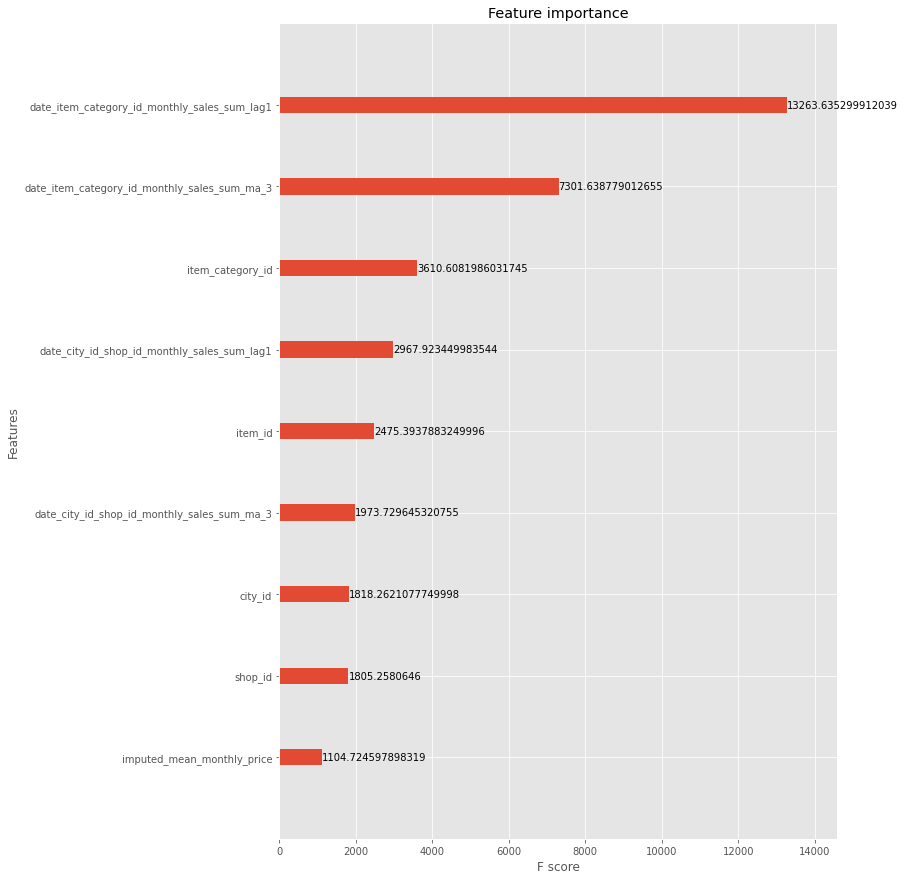

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
plot_importance(model, importance_type = "gain", ax = ax);

In [ ]:
model.predict(X_kaggle_predict)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
'''
y_true = [10, 9, 8, 13, 7]

y_pred_1 = [9, 10, 9, 14, 9]

y_pred_2 = [10, 9, 8, 13, 100]

print(np.sqrt(mean_squared_error(y_true = y_true, y_pred = y_pred_1)))
print(np.sqrt(mean_squared_error(y_true = y_true, y_pred = y_pred_2)))
'''

'\ny_true = [10, 9, 8, 13, 7]\n\ny_pred_1 = [9, 10, 9, 14, 9]\n\ny_pred_2 = [10, 9, 8, 13, 100]\n\nprint(np.sqrt(mean_squared_error(y_true = y_true, y_pred = y_pred_1)))\nprint(np.sqrt(mean_squared_error(y_true = y_true, y_pred = y_pred_2)))\n'

In [ ]:
y_kaggle_predict = model.predict(X_test)

rmse_valida = np.sqrt(mean_squared_error(y_test, y_kaggle_predict))
rmse_valida

5.915451648784287

In [ ]:
y_kaggle_predict

array([ 9.339854 ,  8.128407 ,  8.128407 , 14.276309 , 14.355012 ,
       11.314524 ,  5.5339036,  4.018815 , 10.486511 ,  7.852709 ,
        6.77963  ,  3.4128687,  7.190988 ,  7.285266 , 19.029959 ,
        8.182415 ,  8.182415 ,  8.182415 ,  7.065939 ,  6.701047 ,
        6.153765 ,  9.83566  , 15.397311 ,  8.860655 , 13.840425 ,
        3.4128687,  6.77963  , 10.486511 ,  5.659727 , 14.960136 ,
       14.398924 ,  6.701047 ,  6.153765 ,  7.065939 ,  8.3709545,
        5.2751107,  8.128407 ,  8.182415 ,  7.285266 , 19.029959 ,
        4.018815 , 14.209912 , 10.486511 ,  4.645702 , 15.977603 ,
       15.551296 ,  4.446243 , 10.027698 ,  7.682593 ,  9.948995 ,
        9.684737 ,  6.8436418,  7.1006217,  8.691489 ,  8.560389 ,
        8.28804  ,  8.28804  ,  8.511198 ,  7.287888 , 10.291726 ,
        8.888488 , 13.135019 ,  6.981991 ,  3.6242962,  3.3673165,
        4.5349293,  4.5324235, 14.336581 ,  3.3365483,  9.754017 ,
       12.046866 ,  7.796944 ,  4.6918   ,  3.560066 ,  9.9167